# 数据预处理与可视化

In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 导入数据集

In [2]:
db_bitcoin = pd.read_csv("database\BCHAIN-MKPRU.csv")
db_gold = pd.read_csv("database\LBMA-GOLD.csv")
date_bitcoin, value_bitcoin = db_bitcoin.values[:, 0], db_bitcoin.values[:, 1]
date_gold, value_gold = db_gold.values[:, 0], db_gold.values[:, 1]

# gold有缺失值，因为gold不是每天都能交易
mask = np.isin(date_bitcoin, date_gold)
date_gold_new = date_bitcoin
value_gold_new = np.zeros_like(value_bitcoin)
ind_gold = 0
for i in range(0, len(mask)):
    if mask[i] == False:
        value_gold_new[i] = value_gold_new[i - 1]
    else:
        if np.isnan(value_gold[ind_gold]):
            value_gold_new[i] = value_gold_new[i - 1]
        else:
            value_gold_new[i] = value_gold[ind_gold]
        ind_gold += 1

value_gold_new[0] = value_gold_new[1]
date_gold = date_gold_new
value_gold = value_gold_new

## 获得动态平均值

日期为$d$的动态平均值为$\frac{1}{period}\sum_{d-period+1}^{d}value_i$

动态平均值更能反映趋势走向

In [3]:
period = 30
meanvalue_bitcoin = np.convolve(value_bitcoin, np.ones(period)/ period, mode="valid")
meanvalue_gold = np.convolve(value_gold, np.ones(period)/ period, mode="valid")

## 画图

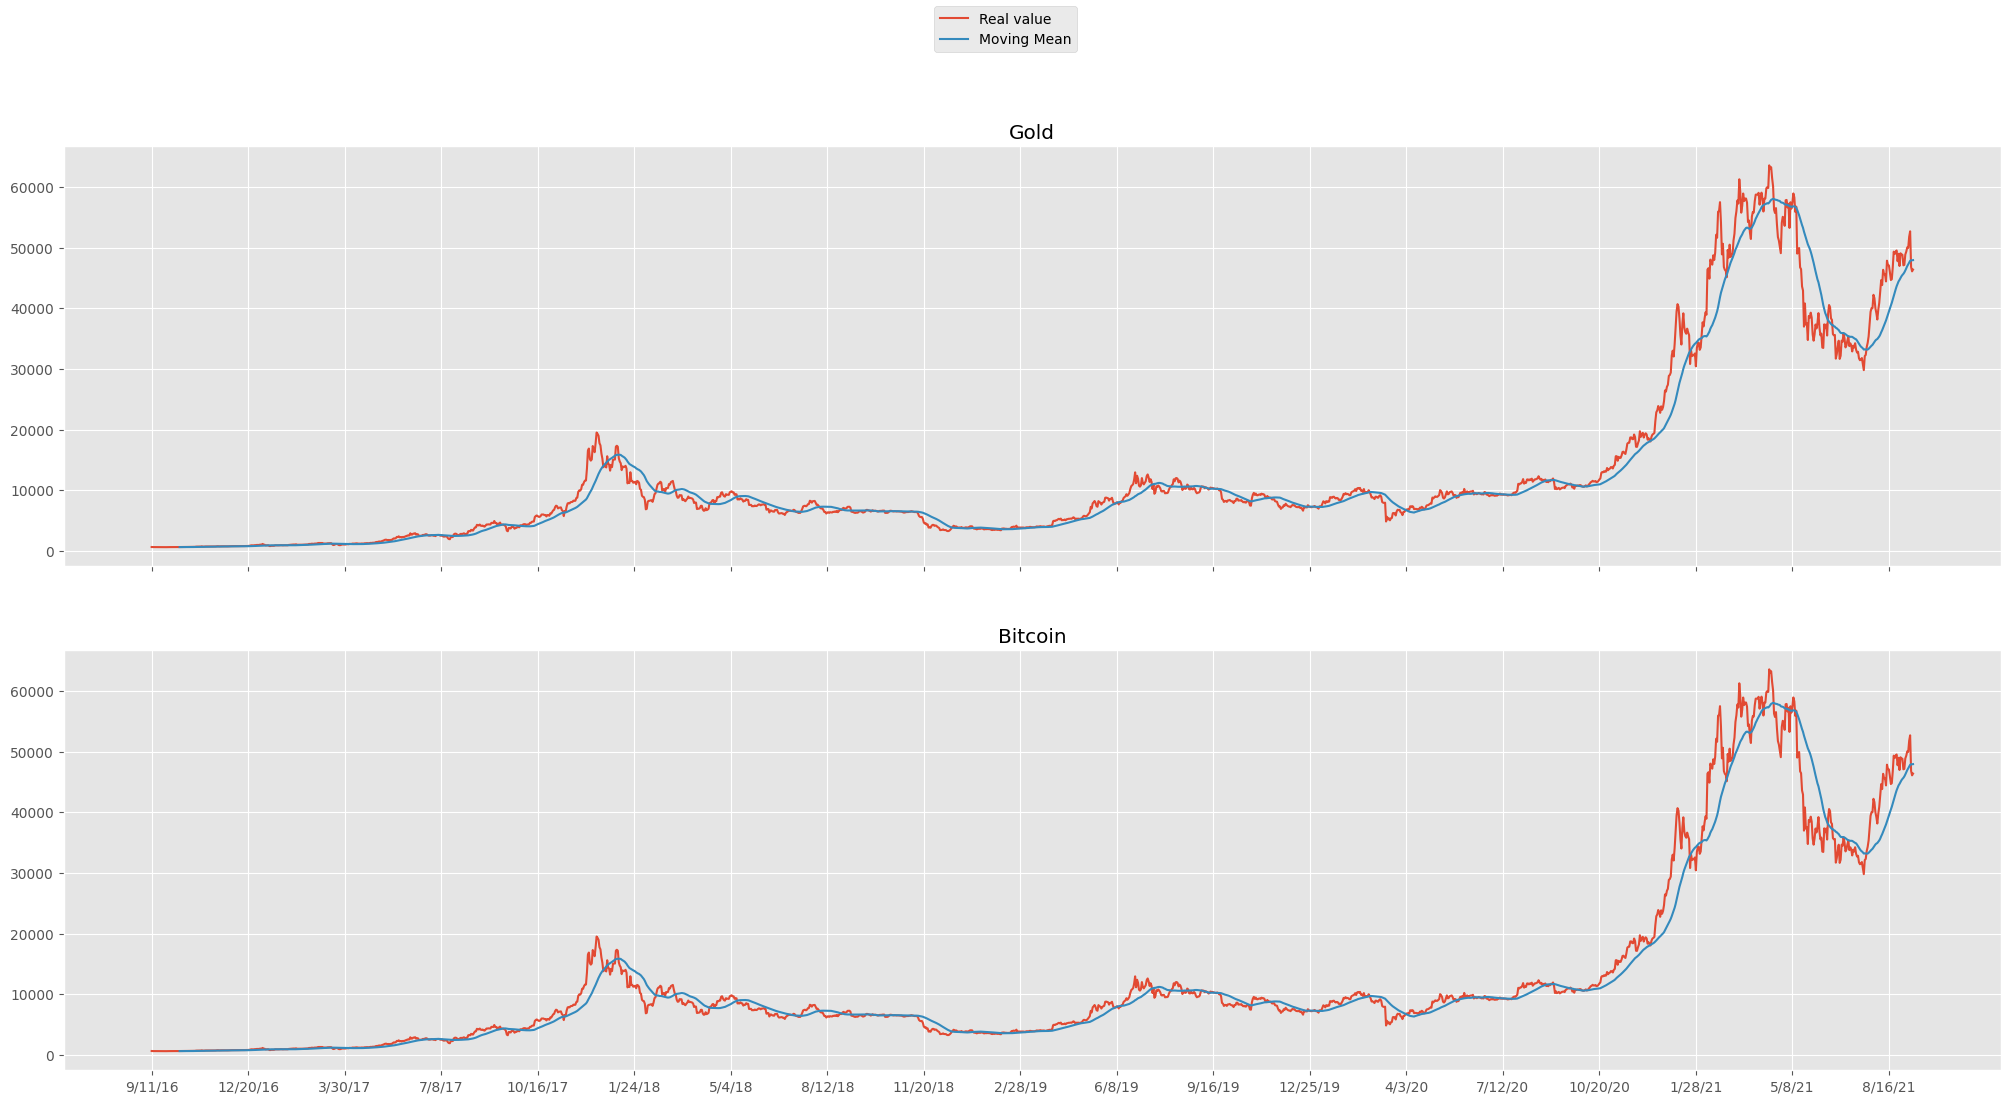

In [4]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 1, sharex='all')
fig.set_size_inches((25, 12))
# gold
ax[0].plot(date_bitcoin, value_bitcoin)
ax[0].plot(date_bitcoin[period - 1 ::], meanvalue_bitcoin)
ax[0].set_xticks(date_gold[0::100])
ax[0].set_title('Gold')
# bitcoin
ax[1].plot(date_bitcoin, value_bitcoin)
ax[1].plot(date_bitcoin[period - 1 ::], meanvalue_bitcoin)
ax[1].set_title('Bitcoin')

fig.legend(['Real value', 'Moving Mean'], loc='upper center')

---
# 数据预测示例

---
# 量化参数可视化

## 走势

### 预测值

### 动量

Text(0.5, 1.0, 'Bitcoin')

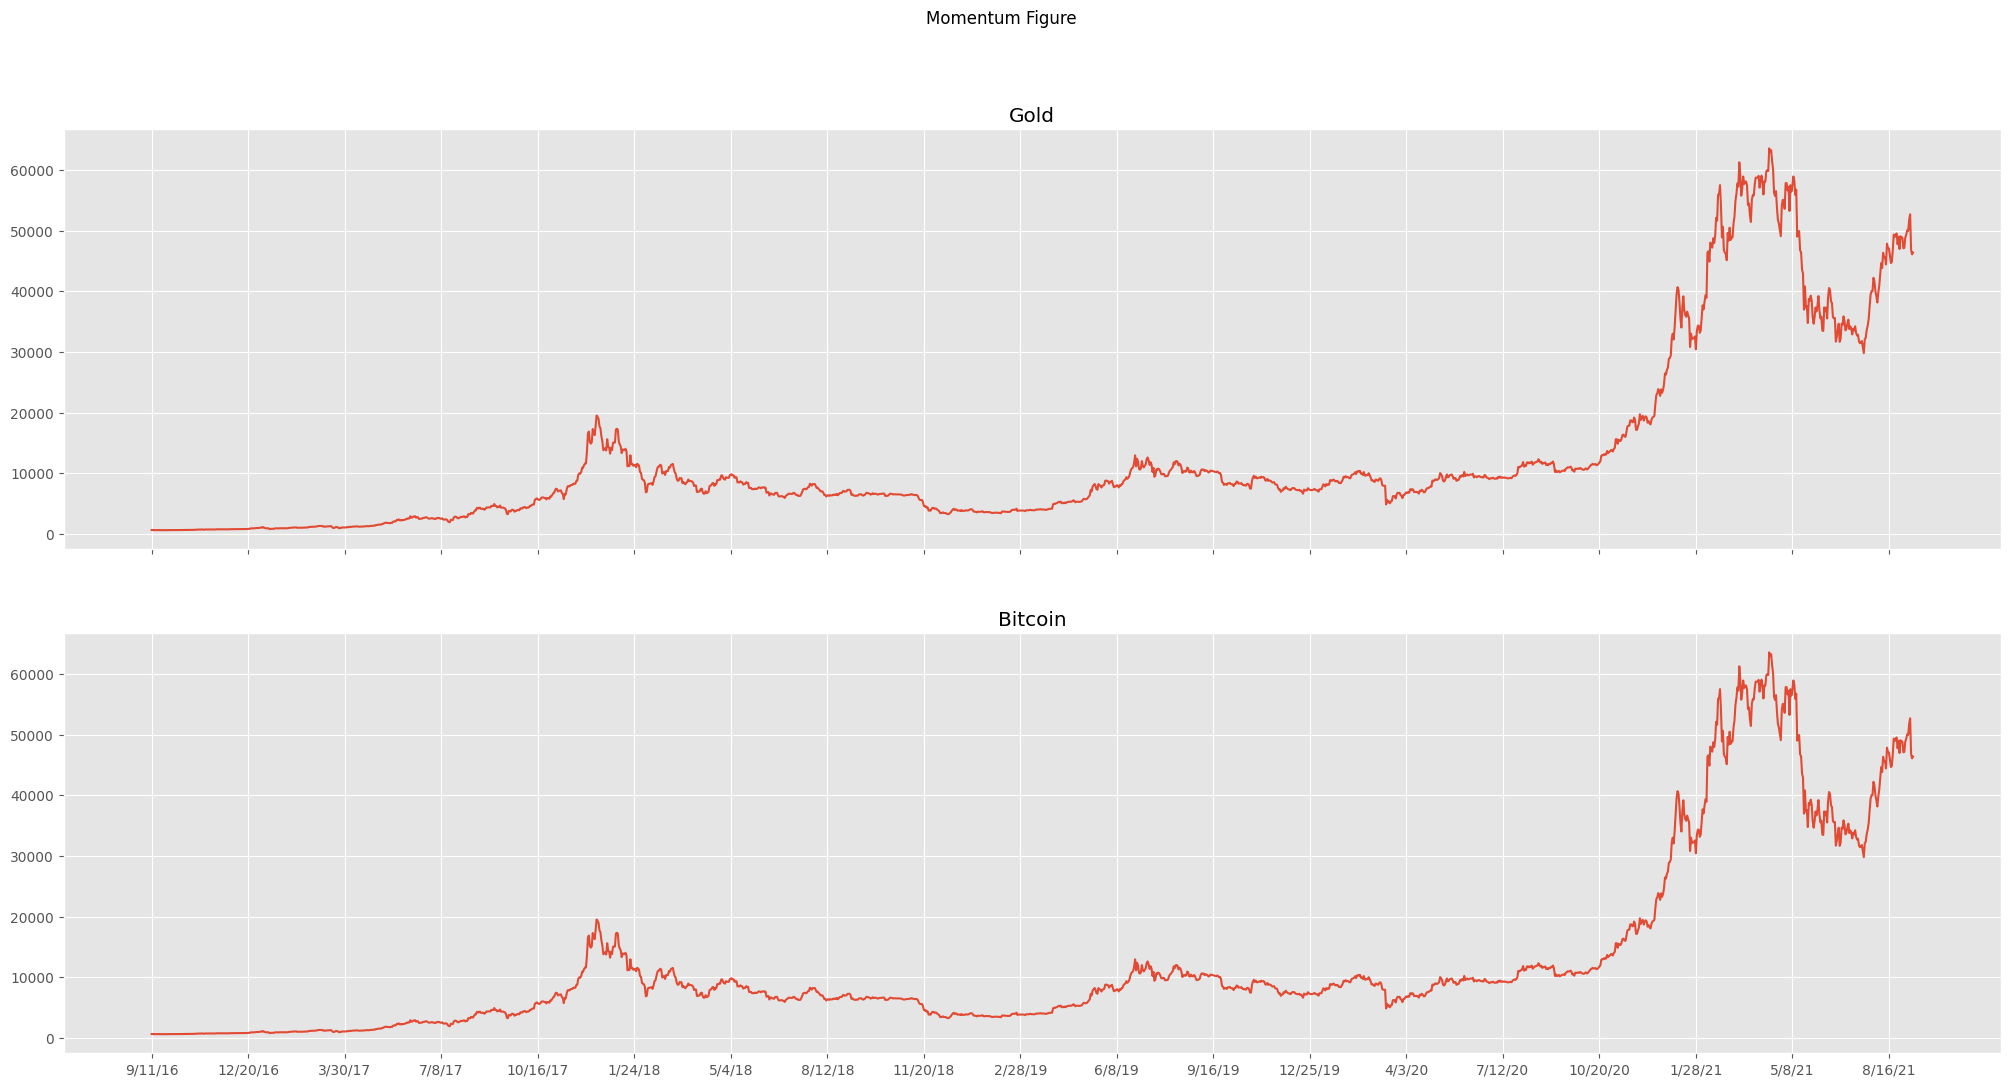

In [5]:
momentum_bitcoin = np.diff(np.diff(value_bitcoin))
momentum_gold = np.diff(np.diff(value_gold))
# draw momentum
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 1, sharex='all')
fig.set_size_inches((25, 12))
fig.suptitle('Momentum Figure')
# gold
ax[0].plot(date_bitcoin, value_bitcoin)
ax[0].set_xticks(date_gold[0::100])
ax[0].set_title('Gold')
# bitcoin
ax[1].plot(date_bitcoin, value_bitcoin)
ax[1].set_title('Bitcoin')